# Logistic Regression Project

**GOAL: Create a Classification Model that can predict whether or not a person has presence of heart disease based on physical features of that person (age,sex, cholesterol, etc...)**

## Imports

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Data

This database contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence). In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

Content

Attribute Information:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease

Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

----

In [8]:
df = pd.read_csv('heart.csv')

In [9]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
df['target'].unique()

array([1, 0], dtype=int64)

### Exploratory Data Analysis and Visualization

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


### Visualization

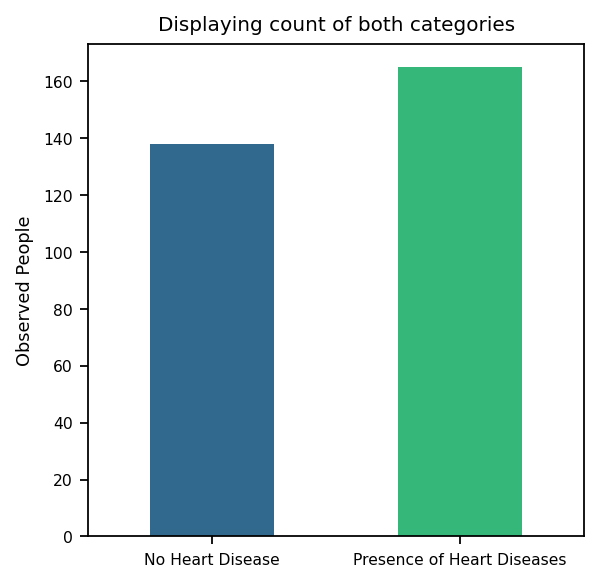

In [15]:
plt.figure(figsize = (4,4), dpi = 160)
sns.countplot(data = df, x = 'target', width=0.5, palette='viridis', saturation=1)
plt.xlabel("")
plt.xticks([0,1], ['No Heart Disease', 'Presence of Heart Diseases'], size = 7)
plt.ylabel("Observed People", size = 8)
plt.title("Displaying count of both categories", size = 9)
plt.yticks(size = 7);

**Creating a pairplot that displays the relationships between the following columns:**

    ['age','trestbps', 'chol','thalach','target']

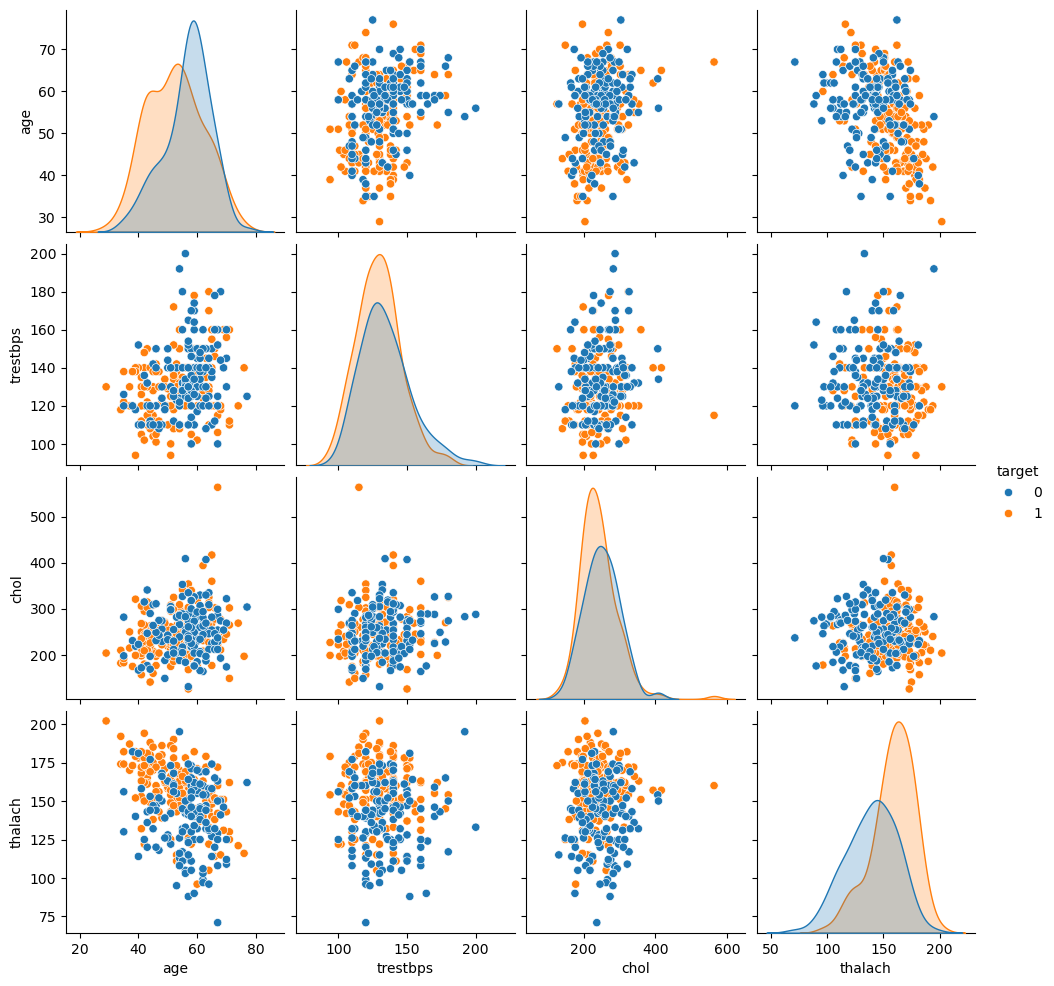

In [17]:
sns.pairplot(data = df, x_vars = ['age','trestbps', 'chol','thalach'], y_vars = ['age','trestbps', 'chol','thalach'], hue = 'target');

<Axes: >

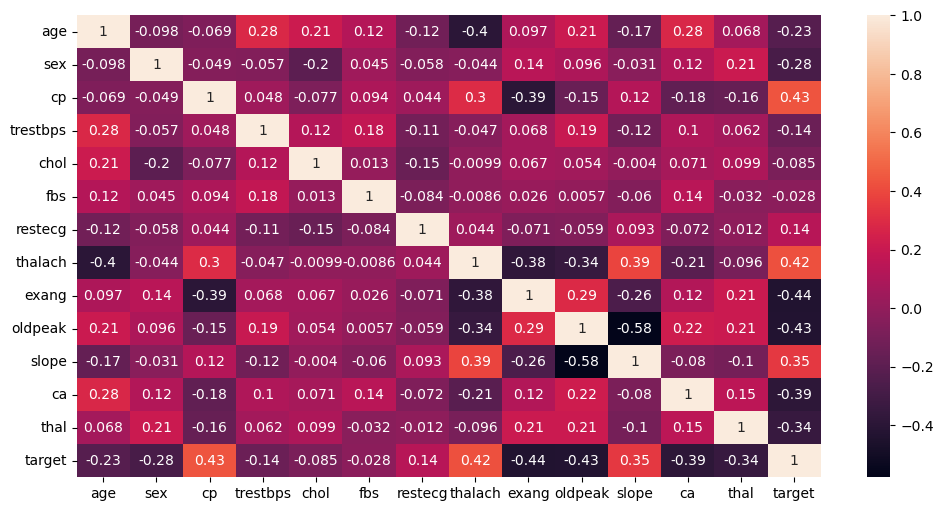

In [18]:
plt.figure(figsize = (12,6))
sns.heatmap(df.corr(), annot=True)

----
----

# Machine Learning

## Train | Test Split and Scaling


In [20]:
X = df.drop('target', axis = 1)
y = df['target']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler_obj = StandardScaler()
scaled_X_train = scaler_obj.fit_transform(X_train)
scaled_X_test = scaler_obj.transform(X_test)

## Logistic Regression Model

**Logistic Regression model with Cross-Validation to find a well-performing C value for the hyper-parameter search.**

In [26]:
from sklearn.linear_model import LogisticRegressionCV

In [27]:
model_cv = LogisticRegressionCV()
model_cv.fit(scaled_X_train, y_train)

LogisticRegressionCV()

In [28]:
#trying using GridSearch CV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [29]:
base_model = LogisticRegression(solver='saga', max_iter=10000)

penalty = ['l1', 'l2', 'elasticnet']
C = np.logspace(0,4,10)
l1_ratio = np.linspace(0,1,10)

param_grid = {'penalty' : penalty, 'C' : C, 'l1_ratio' : l1_ratio}

In [30]:
grid_cv_model = GridSearchCV(estimator = base_model, param_grid = param_grid)
grid_cv_model.fit(scaled_X_train, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=10000, solver='saga'),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'l1_ratio': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [31]:
# Using Default Values like, solver = 'lbfgs', penalty = 'l2', Cv = None (Stratified Fold, between 3-Fold to 5-Fold)
print(model_cv.C_)
print(model_cv.coef_)

[0.04641589]
[[-0.09624234 -0.39455733  0.53541263 -0.13845013 -0.0882132   0.02495565
   0.08083019  0.29896895 -0.33440044 -0.35252781  0.25100118 -0.49732614
  -0.37440968]]


In [32]:
# Using Custom Values like, solver = 'saga', penalty = 'l1/l2/elasticnet', C = log(0,4)
best_lr_model = grid_cv_model.best_estimator_
print(best_lr_model.coef_)
grid_cv_model.best_params_

[[-0.04777863 -0.69648324  0.88805112 -0.23904424 -0.18646549  0.00232692
   0.09607846  0.42202596 -0.40859241 -0.52472179  0.35753772 -0.83232467
  -0.56453738]]


{'C': 1.0, 'l1_ratio': 0.0, 'penalty': 'l1'}

**Visualization of the coefficients by using a barplot of their values.**

In [34]:
coef_df = pd.Series(index = X.columns, data = model_cv.coef_[0])
coef_df = coef_df.sort_values()

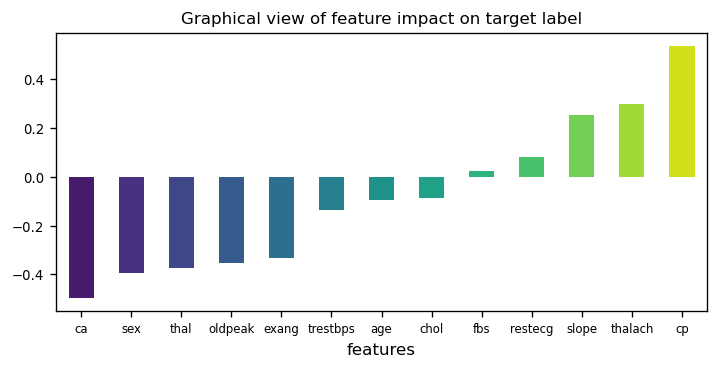

In [35]:
plt.figure(figsize = (7,3), dpi = 120)
sns.barplot(x = coef_df.index, y = coef_df.values, width=0.5, palette='viridis', saturation=1)
plt.xticks(size = 7)
plt.xlabel('features')
plt.ylabel('')
plt.yticks(size = 8)
plt.title('Graphical view of feature impact on target label', size = 10);

---------

## Model Performance Evaluation

**Creating the following evaluations:**
* Confusion Matrix Array
* Confusion Matrix Plot
* Classification Report

In [38]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, roc_auc_score, roc_curve, auc, PrecisionRecallDisplay

In [39]:
# I have two models, grid_cv_model and model_cv
# Let's start with LogisticRegressionCV model
y_pred = model_cv.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[14,  1],
       [ 5, 11]], dtype=int64)

In [40]:
#Let's check the results from grid_model
# y_pred = grid_cv_model.predict(X_test)
# confusion_matrix(y_test, y_pred)

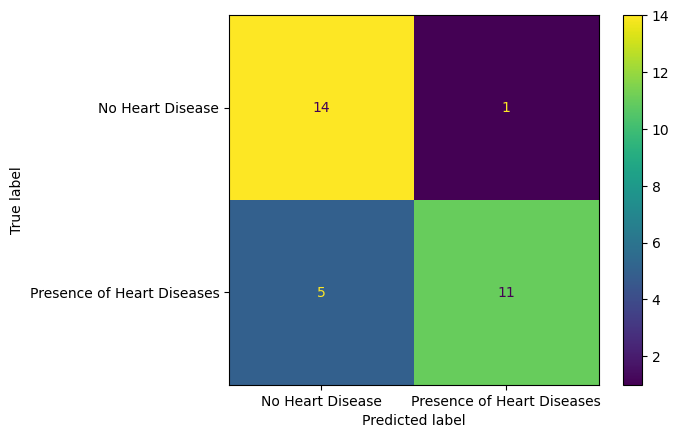

In [41]:
ConfusionMatrixDisplay(cm, display_labels = ['No Heart Disease', 'Presence of Heart Diseases']).plot();

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.93      0.82        15
           1       0.92      0.69      0.79        16

    accuracy                           0.81        31
   macro avg       0.83      0.81      0.80        31
weighted avg       0.83      0.81      0.80        31



In [43]:
accuracy_score(y_test, y_pred)

0.8064516129032258

### Performance Curves

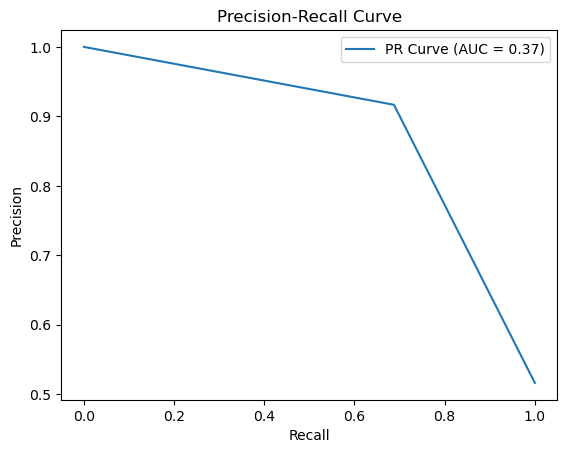

In [45]:
precision, recall, threshold_pr = precision_recall_curve(y_test, y_pred)
pr_auc = auc(precision, recall)
plt.plot(recall, precision, label=f'PR Curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [46]:
#Another way, but not much correct
#PrecisionRecallDisplay(precision, recall).plot()

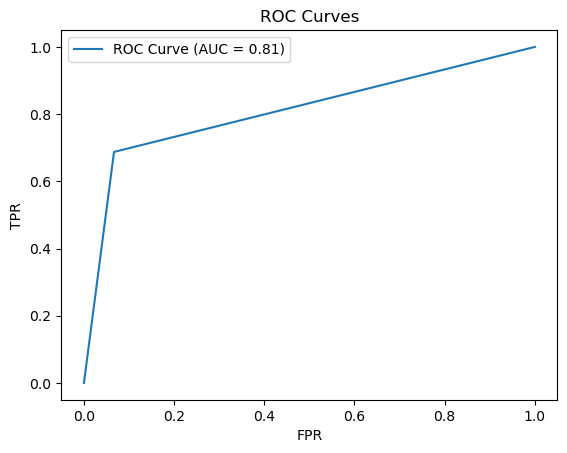

In [106]:
fpr, tpr,_ = roc_curve(y_test, y_pred)  
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curves')
plt.legend()
plt.show()

**A patient with the following features has come into the medical office:**

    age          48.0
    sex           0.0
    cp            2.0
    trestbps    130.0
    chol        275.0
    fbs           0.0
    restecg       1.0
    thalach     139.0
    exang         0.0
    oldpeak       0.2
    slope         2.0
    ca            0.0
    thal          2.0

**What does your model predict for this patient? Do they have heart disease? How "sure" is your model of this prediction?**

In [50]:
patient1 = [[48.0, 0.0,2.0, 130.0, 275.0, 0.0, 1.0, 139.0, 0.0, 0.2, 2.0, 0.0, 2.0]]

In [51]:
# EXPECTED PROBABILITY PER CLASS (Basically model should be extremely sure its in the selected class)

In [52]:
print(model_cv.predict(patient1))
model_cv.predict_proba(patient1)

[0]


array([[0.98636888, 0.01363112]])

We're **98%** sure that the patient belongs to class 0 that means the patient doesn't have any heart disease.

----
